# Amazu CTR 数据探索

## 1、导入必要工具包

In [1]:
# 首先导入必要的工具包
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2、读取数据

In [2]:
# 数据路径
dpath = './data/'

filename = "train.csv"
n = sum(1 for line in open(dpath + filename))
s = 10000000 #desired sample size
# 随机取样
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
train = pd.read_csv(dpath + filename, skiprows=skip)

print("Num of data is %d" % n)

Num of data is 40428968


In [3]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000126e+19,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21689,320,50,2496,3,167,100191,23
1,1.000252e+19,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,1,0,20984,320,50,2371,0,551,-1,46
2,1.000525e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100083,79
3,1.000554e+19,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20984,320,50,2371,0,551,100217,46
4,1.000656e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,-1,79


In [4]:
# 检查数据规模
print("Train:", train.shape)
# 查看数据基本信息
train.info()

Train: (9999999, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999999 entries, 0 to 9999998
Data columns (total 24 columns):
id                  float64
click               int64
hour                int64
C1                  int64
banner_pos          int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
dtypes: float64(1), int64(14), object(9)
memory usage: 1.8+ GB


虽然很多都是数值型变量，但是代表的含义都是类别型，所以也是离散型变量。

## 3、数据分析

In [5]:
# 保存数据ID
ID = train['id']
click = train['click']
X_train = train.drop(['id', 'click'], axis=1)
# 保存列名
feat_names = X_train.columns

### 3.1离散型特征分布

In [6]:
for col in feat_names:
    print('\n%s特征的不同取值和出现次数' % col)
    print(train[col].value_counts())


hour特征的不同取值和出现次数
14102209    110898
14102210    108823
14102813    106995
14102212    100727
14102814     96237
14102211     95697
14103004     85839
14102809     81272
14102213     79830
14102208     79509
14102808     72589
14102206     71438
14102205     70932
14102816     70185
14102815     69996
14102817     69323
14102812     67615
14102105     67384
14102304     67380
14102104     65844
14102417     65217
14103014     64083
14102811     63959
14102810     63763
14102416     62610
14103013     61943
14103012     61531
14102315     60861
14103005     60659
14102514     59914
             ...  
14102300     22216
14102122     22036
14102622     22026
14102522     21980
14102723     21596
14103000     21586
14102702     21123
14103023     20694
14102400     20499
14102621     20388
14102800     20308
14102601     20016
14102501     19907
14102200     19258
14102523     19086
14102623     18997
14102504     18928
14102701     18554
14102123     18203
14102500     18056
14102600     

6b9769f2    51276
431b3174    33468
2f323f36    21780
930ec31d    21650
af9205f9    21608
009a7861    21068
285aa37d    21022
af62faf4    20996
d90a7774    20728
6394f6f6    20700
c6563308    17723
57cd4006    17471
75bb1b58    17384
1cf29716    17335
0489ce3f    17306
a8536f3a    17209
488a9a3e    17128
ddd2926e    17109
ceffea69    17089
8a014cbb    17028
9b1fe278    16490
07875ea4     9199
7ed30f6c     9030
b0070d9a     8827
693bff3e     8547
bca8f26d     8402
ac77b71a     8344
e54c1344     7347
95b2935e     7272
ff1c4f79     7228
            ...  
2f412615        1
4a80afe3        1
41383604        1
c220613f        1
b0209456        1
b1376110        1
ffe0bfc6        1
d481d0ad        1
161b5d39        1
39a50257        1
34985866        1
447ae784        1
8d0187a5        1
6105dc5f        1
ec79632c        1
a9f1dcd1        1
fcfd905e        1
950418c7        1
5f79f246        1
2c14b673        1
c6f474e7        1
5b1cbfd5        1
6a8168a0        1
d51c1c7d        1
2d5f3d18  

在22个特征中，这些特征的值空间超过了一百：'site_id', 'site_domain', 'app_id', 'app_domain', 'device_id', 'device_ip', 'device_model', 'C14', 'C17', 'C20'。
如果直接用独热编码可能会造成维度过高，模型笨重计算缓慢，如果用GBDT可能会导致搜索范围过大造成过拟合，所以这些特征可以考虑直接放入LR。
'hour', 'C1','banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C19', 'C21'可以做独热编码。其他可以做哈希编码。

### 3.2查看每个变量的分布 及其与标签之间的关系

#### click

Text(0, 0.5, 'Number of occurrences')

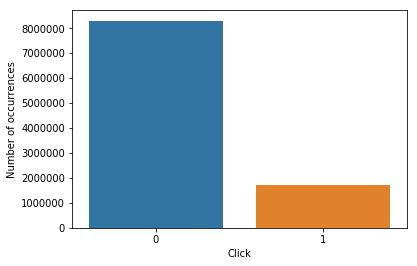

In [7]:
#该问题为分类问题，类别型特征直方图可用countplot
sns.countplot(train['click'])
plt.xlabel('Click')
plt.ylabel('Number of occurrences')

正负样本比例大概8：1。

#### hour

Text(0, 0.5, 'Occurrences')

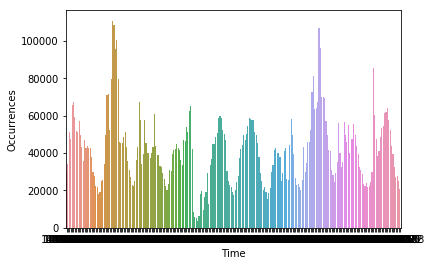

In [8]:
# 查看时间特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['hour'])
plt.xlabel('Time')
plt.ylabel('Occurrences')

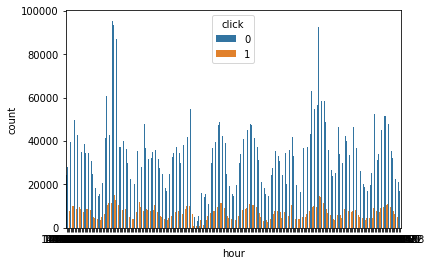

In [9]:
sns.countplot(x="hour", hue="click",data=train)

C:\Users\Nick\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


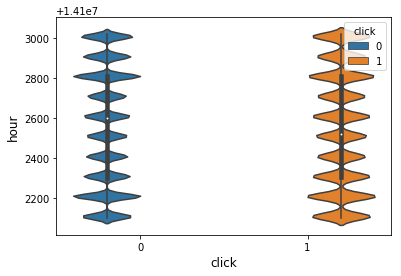

In [10]:
sns.violinplot(x='click', y='hour', data=train, hue="click")
plt.xlabel('click', fontsize=12)
plt.ylabel('hour', fontsize=12)
plt.show()

好像时间和点击率没有太大的关联。

#### C1

Text(0, 0.5, 'Occurrences')

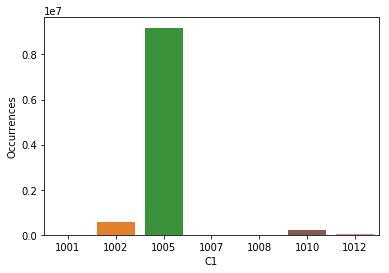

In [11]:
# 查看C1特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['C1'])
plt.xlabel('C1')
plt.ylabel('Occurrences')

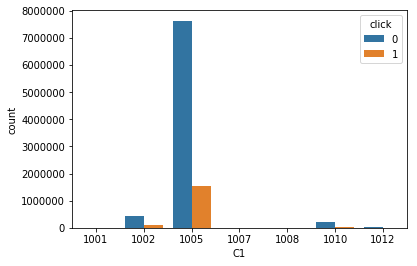

In [12]:
sns.countplot(x="C1", hue="click",data=train)

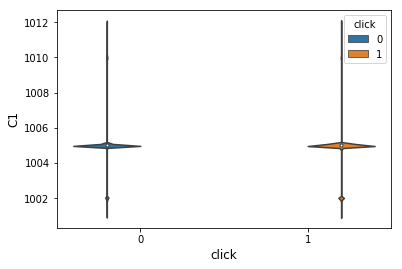

In [13]:
sns.violinplot(x='click', y='C1', data=train, hue="click")
plt.xlabel('click', fontsize=12)
plt.ylabel('C1', fontsize=12)
plt.show()

#### banner_pos（广告位置）

Text(0, 0.5, 'Occurrences')

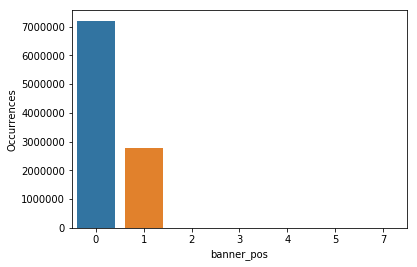

In [14]:
# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['banner_pos'])
plt.xlabel('banner_pos')
plt.ylabel('Occurrences')

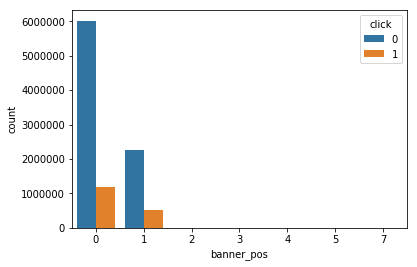

In [15]:
sns.countplot(x="banner_pos", hue="click",data=train)

#### site_id（站点id）

Text(0, 0.5, 'Occurrences')

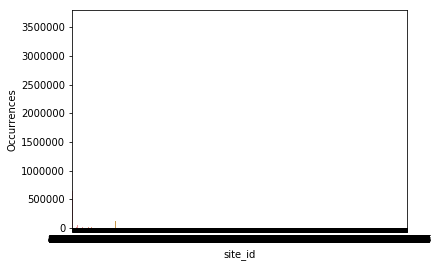

In [16]:
# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['site_id'])
plt.xlabel('site_id')
plt.ylabel('Occurrences')

这种特征种类过多的数据图标上好像没办法很形象地表示。
我们只对特征种类比较少的特征数据看一下分布情况。

#### site_category（站点类别）

Text(0, 0.5, 'Occurrences')

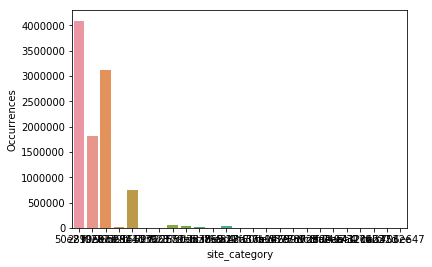

In [17]:
# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['site_category'])
plt.xlabel('site_category')
plt.ylabel('Occurrences')

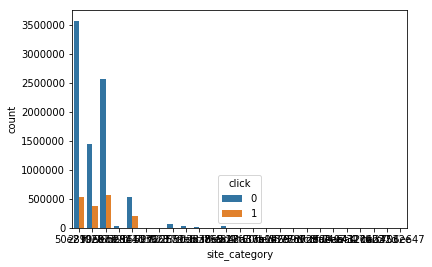

In [18]:
sns.countplot(x="site_category", hue="click",data=train)

样本分布比较不均衡的数据好像很难从图标上看出端倪。

#### app_category

Text(0, 0.5, 'Occurrences')

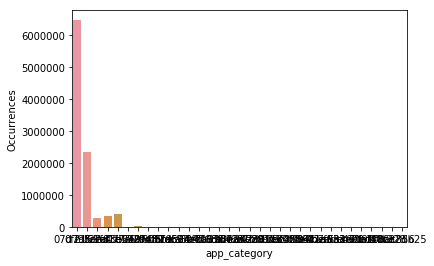

In [19]:
# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['app_category'])
plt.xlabel('app_category')
plt.ylabel('Occurrences')

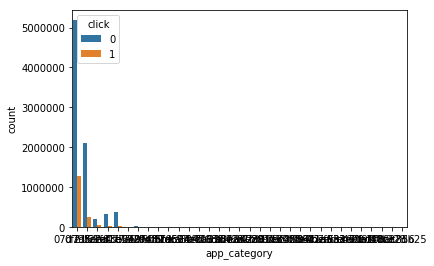

In [20]:
sns.countplot(x="app_category", hue="click",data=train)

#### device_type

Text(0, 0.5, 'Occurrences')

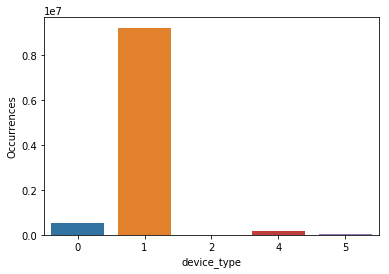

In [21]:
# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['device_type'])
plt.xlabel('device_type')
plt.ylabel('Occurrences')

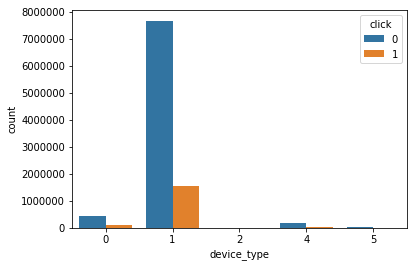

In [22]:
sns.countplot(x="device_type", hue="click",data=train)

#### device_conn_type

Text(0, 0.5, 'Occurrences')

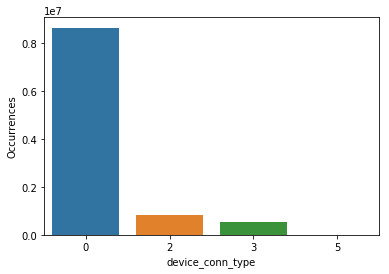

In [23]:
# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['device_conn_type'])
plt.xlabel('device_conn_type')
plt.ylabel('Occurrences')

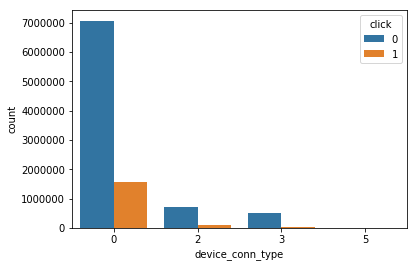

In [24]:
sns.countplot(x="device_conn_type", hue="click",data=train)

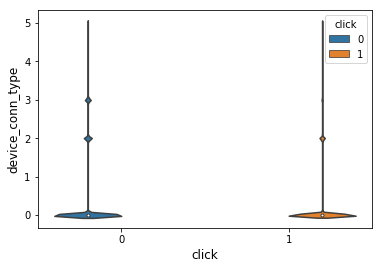

In [25]:
sns.violinplot(x='click', y='device_conn_type', data=train, hue="click")
plt.xlabel('click', fontsize=12)
plt.ylabel('device_conn_type', fontsize=12)
plt.show()

#### C15

Text(0, 0.5, 'Occurrences')

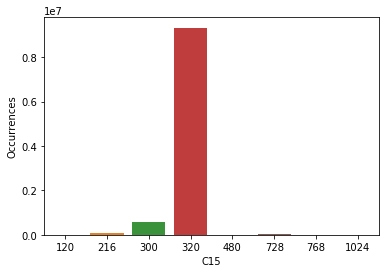

In [26]:
# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['C15'])
plt.xlabel('C15')
plt.ylabel('Occurrences')

Text(0, 0.5, 'Occurrences')

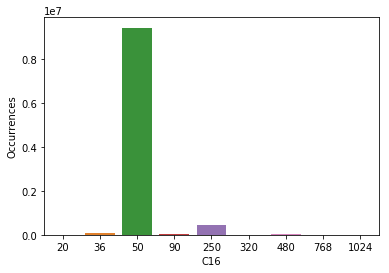

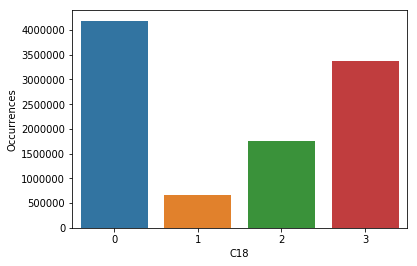

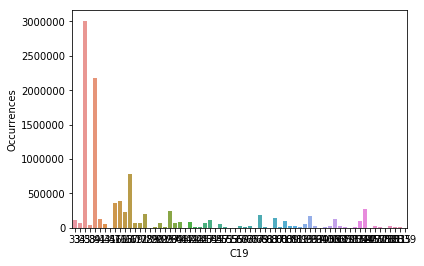

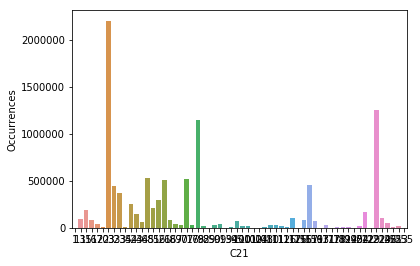

In [27]:
# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['C16'])
plt.xlabel('C16')
plt.ylabel('Occurrences')

# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['C18'])
plt.xlabel('C18')
plt.ylabel('Occurrences')

# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['C19'])
plt.xlabel('C19')
plt.ylabel('Occurrences')

# 查看特征样本分布
fig = plt.figure()
### Number of occurrences
sns.countplot(train['C21'])
plt.xlabel('C21')
plt.ylabel('Occurrences')

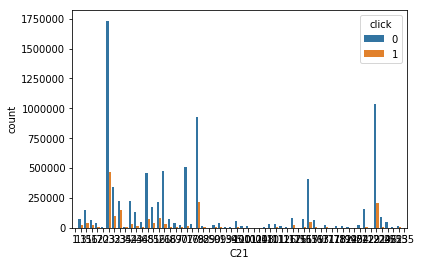

In [28]:
sns.countplot(x="C21", hue="click",data=train)

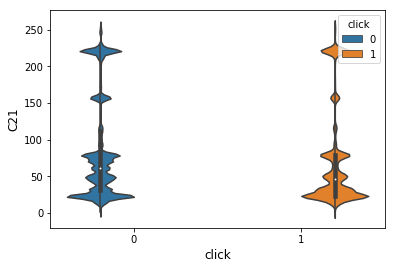

In [29]:
sns.violinplot(x='click', y='C21', data=train, hue="click")
plt.xlabel('click', fontsize=12)
plt.ylabel('C21', fontsize=12)
plt.show()

### 3.3特征之间相关性

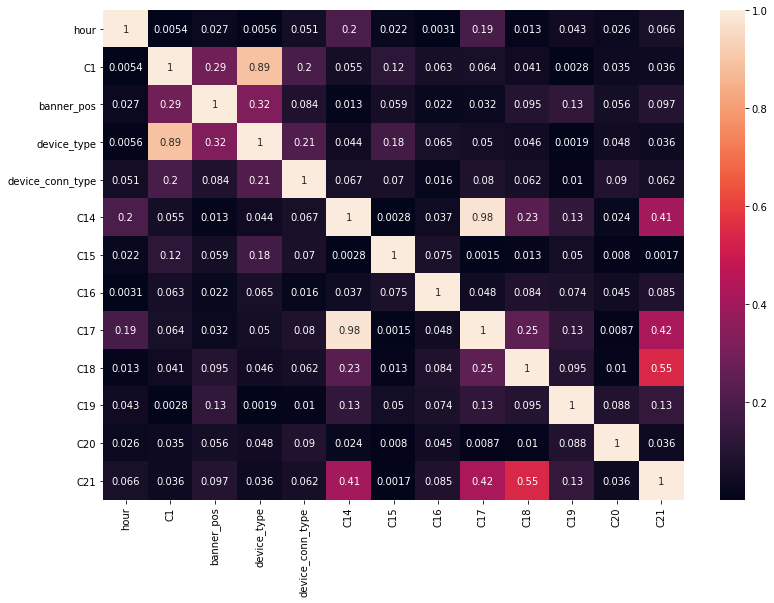

In [30]:
data_corr = X_train.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)